# Cifar10 classification with and without normalization

In this notebook you will download the cifar10 dataset which contains quite small images (32x32x3) of 10 classes. The data is from the Canadian Institute For Advanced Research. You will plot examples of the images with the class label. Note that because the images are so small it's not always very easy to recoginse which of the ten classes is on the image, even as a human. After loading the dataset you will train a Convolutional Neural Network to predict the the test dataset. You will train the neural network once with normalized data and once without.


**Dataset:**  You work with the Cifar10 dataset. You have 60'000 32x32 pixel color images of 10 classes ("airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck")

**Content:**
* load the original cifar10 data and create a train, validation and test dataset
* visualize samples of cifar10 dataset
* use keras to train a CNN with the normalized and the unnormalized version of the data
* check if the normalization has an impact on the test performance of the data



#### Imports


In [1]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers



### Load and plot the data

In the next cell you will load the Cifar10 dataset, 50'000 images are in the training set and 10'000 are in the test dataset. You will use 10'000 for the train and validation dataset.
You will plot one random example of each label and will see
that the images are really small. Finally you will one hot encode the lables.


In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# separate train val and test dataset
X_train=x_train[0:10000] 
Y_train=to_categorical(y_train[0:10000],10) # one-hot encoding

X_val=x_train[20000:30000] 
Y_val=to_categorical(y_train[20000:30000],10)

X_test=x_test 
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


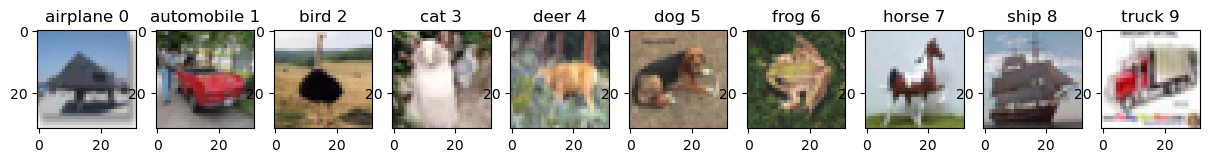

In [4]:
labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
#sample image of each label
plt.figure(figsize=(15,15))
for i in range(0,len(np.unique(np.argmax(Y_train,axis=1)))):
    rmd=np.random.choice(np.where(np.argmax(Y_train,axis=1)==i)[0],1)
    plt.subplot(1,10,i+1)
    img=X_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i] + " " + str(np.argmax(Y_train,axis=1)[rmd][0]))

In [5]:
# check the shape of the data
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

((10000, 32, 32, 3), (10000, 10), (10000, 32, 32, 3), (10000, 10))

# CNN as classification model for the Cifar10 dataset
Now it's your turn, train two CNNs with the same architecture.
* One CNN should be with the original image data (no normalization)
* One CNN should be with the normalized image data 
* Use the train data to fit the model, the validation to validate the training and the test dataset for the performance estimation on new unseen data.

Use the following hyperparameters 

- the relu activation function  
- kernelsize of 3x3  
- poolingsize of 2x2   
- use 2 convolutional layers with 8 filters and then a maxpooling layer followed by again 2 convolutional layers with 16 filters and then a maxpooling layer 
- then we flatten the output and use a fully connected layer with 40 nodes and the output has 10 nodes with the softmax activation.

Compare the performance of the network with and without normalization on the testdataset. What do you observe?

### Without normalization

In [6]:
### Your code here ####

batch_size = 128
nb_classes = 10
img_rows, img_cols = 32, 32
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)


model = Sequential()

model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(8, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [7]:
# summarize model along with number of model weights
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 16)        0

In [8]:
# train the model
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=20,
                  verbose=1, 
                  validation_data=(X_val, Y_val)
                 )

Epoch 1/20
79/79 [==============================] - 6s 76ms/step - loss: 2.8906 - accuracy: 0.1003 - val_loss: 2.2618 - val_accuracy: 0.1394
Epoch 2/20
79/79 [==============================] - 6s 77ms/step - loss: 2.2106 - accuracy: 0.1861 - val_loss: 2.1625 - val_accuracy: 0.2030
Epoch 3/20
79/79 [==============================] - 6s 77ms/step - loss: 2.1062 - accuracy: 0.2316 - val_loss: 2.0516 - val_accuracy: 0.2527
Epoch 4/20
79/79 [==============================] - 6s 80ms/step - loss: 1.9407 - accuracy: 0.2888 - val_loss: 1.8096 - val_accuracy: 0.3355
Epoch 5/20
79/79 [==============================] - 7s 84ms/step - loss: 1.7116 - accuracy: 0.3724 - val_loss: 1.6987 - val_accuracy: 0.3699
Epoch 6/20
79/79 [==============================] - 8s 96ms/step - loss: 1.5642 - accuracy: 0.4304 - val_loss: 1.6426 - val_accuracy: 0.4068
Epoch 7/20
79/79 [==============================] - 8s 97ms/step - loss: 1.4749 - accuracy: 0.4568 - val_loss: 1.5882 - val_accuracy: 0.4122
Epoch 8/20
79

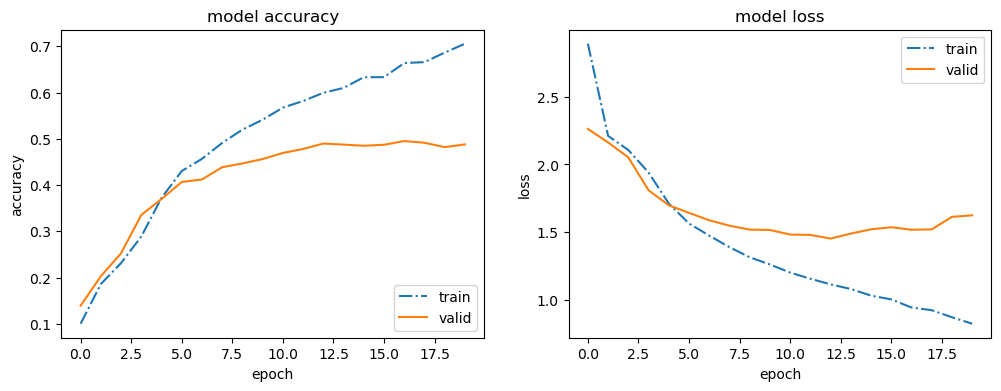

In [9]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [10]:
pred=model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_cnn= " , acc)

[[564  18  77  19  22   9  14  11 222  44]
 [ 69 456   8  24   4  13  16  10 175 225]
 [ 83  11 394  92 117 114  85  45  42  17]
 [ 39  16  92 350  77 227  81  42  47  29]
 [ 61   8 184 111 359  74  93  67  29  14]
 [ 31   5 102 215  61 441  36  64  28  17]
 [ 12  14  94 125  78  49 572  13  31  12]
 [ 47   4  69  89  91 132  22 476  19  51]
 [140  33  22  17   4  11   8   7 719  39]
 [ 68 124  19  37   5  15  10  25 146 551]]
Acc_cnn=  0.4882


### With normalization

We reload the original images and normalize this time by dividing with 255.

In [11]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# separate train val and test dataset
X_train=x_train[0:10000]/255
Y_train=to_categorical(y_train[0:10000],10) # one-hot encoding

X_val=x_train[20000:30000]/255
Y_val=to_categorical(y_train[20000:30000],10)

X_test=x_test/255 
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
### Your code here ####

batch_size = 128
nb_classes = 10
img_rows, img_cols = 32, 32
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)


model = Sequential()

model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(8, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [13]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_8 (Activation)    (None, 16, 16, 16)       

In [14]:
# train the model
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=20,
                  verbose=1, 
                  validation_data=(X_val, Y_val)
                 )

Epoch 1/20
79/79 [==============================] - 10s 123ms/step - loss: 2.1565 - accuracy: 0.1971 - val_loss: 1.8882 - val_accuracy: 0.3092
Epoch 2/20
79/79 [==============================] - 9s 110ms/step - loss: 1.7907 - accuracy: 0.3574 - val_loss: 1.7355 - val_accuracy: 0.3723
Epoch 3/20
79/79 [==============================] - 9s 109ms/step - loss: 1.6962 - accuracy: 0.3898 - val_loss: 1.7408 - val_accuracy: 0.3813
Epoch 4/20
79/79 [==============================] - 9s 111ms/step - loss: 1.6080 - accuracy: 0.4172 - val_loss: 1.6301 - val_accuracy: 0.4208
Epoch 5/20
79/79 [==============================] - 9s 110ms/step - loss: 1.5700 - accuracy: 0.4323 - val_loss: 1.5649 - val_accuracy: 0.4297
Epoch 6/20
79/79 [==============================] - 9s 114ms/step - loss: 1.5086 - accuracy: 0.4563 - val_loss: 1.5042 - val_accuracy: 0.4517
Epoch 7/20
79/79 [==============================] - 9s 120ms/step - loss: 1.4599 - accuracy: 0.4762 - val_loss: 1.4831 - val_accuracy: 0.4614
Epoch

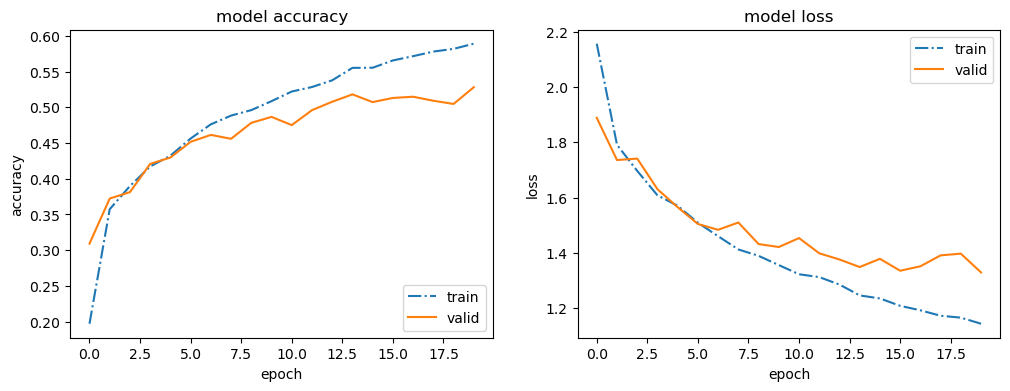

In [15]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [16]:
pred=model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_cnn= " , acc)

[[738  35  57  19   9   4  14  10  73  41]
 [ 48 729  10   7   1   4  10   9  46 136]
 [117  19 430 104  91  87  63  48  19  22]
 [ 45  47  85 402  47 177  90  38  18  51]
 [ 83  16 166 113 369  47  98  82  14  12]
 [ 28  15 114 255  47 395  38  68  20  20]
 [ 18  43  54 124  65  24 594  14  13  51]
 [ 53  20  49  90  55  94  12 567   5  55]
 [237  89  18  19   3   2   5  11 554  62]
 [ 73 257  18  28   1   6  18   9  53 537]]
Acc_cnn=  0.5315
